In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
!pip install citipy

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | onega
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | cartagena
Processing Record 6 of Set 1 | sarakhs
Processing Record 7 of Set 1 | los andes
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | le port
Processing Record 13 of Set 1 | grand centre
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | dali
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | plettenberg bay
Processing Record 19 of Set 1 | pangai
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | southbridge
Processing Record 22 of Set 1 | kruisfontein
Process

Processing Record 38 of Set 4 | ambilobe
Processing Record 39 of Set 4 | abalak
Processing Record 40 of Set 4 | vagur
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | puerto leguizamo
Processing Record 43 of Set 4 | winslow
Processing Record 44 of Set 4 | lluta
Processing Record 45 of Set 4 | saint-augustin
Processing Record 46 of Set 4 | alexandria
Processing Record 47 of Set 4 | los algarrobos
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | batagay
Processing Record 50 of Set 4 | faya
Processing Record 1 of Set 5 | gambela
Processing Record 2 of Set 5 | kyabram
Processing Record 3 of Set 5 | hede
Processing Record 4 of Set 5 | bato
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | port blair
Processing Record 7 of Set 5 | guhagar
Processing Record 8 of Set 5 | banda aceh
Processing Record 9 of Set 5 | chuy
Processing Record 10 of Set 5 | inhambane
Processing Record 11 of Set 5 | talnakh
Processing Record 12 of S

Processing Record 26 of Set 8 | tazovskiy
Processing Record 27 of Set 8 | ruwi
Processing Record 28 of Set 8 | faanui
Processing Record 29 of Set 8 | jacksonville
Processing Record 30 of Set 8 | ruginesti
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | sangar
Processing Record 33 of Set 8 | vetlanda
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | aguimes
Processing Record 36 of Set 8 | east london
Processing Record 37 of Set 8 | esmeraldas
Processing Record 38 of Set 8 | coolum beach
Processing Record 39 of Set 8 | aflu
City not found. Skipping...
Processing Record 40 of Set 8 | aswan
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | doba
Processing Record 44 of Set 8 | genhe
Processing Record 45 of Set 8 | snyder
Processing Record 46 of Set 8 | paka
Processing Record 47 of Set 8 | lorengau
Processing Record 48 of Set 8 | kilmez
City not found. Skipping...
Processin

Processing Record 13 of Set 12 | san luis
Processing Record 14 of Set 12 | nguiu
City not found. Skipping...
Processing Record 15 of Set 12 | lively
Processing Record 16 of Set 12 | chapais
Processing Record 17 of Set 12 | walvis bay
Processing Record 18 of Set 12 | mbekenyera
Processing Record 19 of Set 12 | kochubey
Processing Record 20 of Set 12 | greytown
Processing Record 21 of Set 12 | ballina
Processing Record 22 of Set 12 | uspenka
Processing Record 23 of Set 12 | champerico
Processing Record 24 of Set 12 | malwan
City not found. Skipping...
Processing Record 25 of Set 12 | betare oya
Processing Record 26 of Set 12 | labutta
City not found. Skipping...
Processing Record 27 of Set 12 | borisovka
Processing Record 28 of Set 12 | asau
Processing Record 29 of Set 12 | san joaquin
Processing Record 30 of Set 12 | cradock
Processing Record 31 of Set 12 | asilah
Processing Record 32 of Set 12 | pingliang
Processing Record 33 of Set 12 | bambanglipuro
Processing Record 34 of Set 12 | q

In [22]:
len(city_data)

574

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nemuro,43.32,145.57,57.20,76,75,6.93,JP,2020-06-22 01:13:27
1,Onega,63.91,38.14,47.77,69,16,5.57,RU,2020-06-22 01:13:28
2,Busselton,-33.65,115.33,62.01,51,100,23.96,AU,2020-06-22 01:13:28
3,Albany,42.60,-73.97,84.00,55,41,3.20,US,2020-06-22 01:13:28
4,Cartagena,10.40,-75.51,82.18,83,100,10.22,CO,2020-06-22 01:13:04
5,Sarakhs,36.54,61.16,87.80,31,97,6.93,IR,2020-06-22 01:09:02
6,Los Andes,-32.83,-70.60,52.00,99,88,2.64,CL,2020-06-22 01:13:29
7,Kapaa,22.08,-159.32,82.40,69,75,14.99,US,2020-06-22 01:13:29
8,Nouadhibou,20.93,-17.03,73.40,73,0,16.11,MR,2020-06-22 01:13:30
9,Butaritari,3.07,172.79,83.43,76,0,14.74,KI,2020-06-22 01:13:30


In [24]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nemuro,JP,2020-06-22 01:13:27,43.32,145.57,57.20,76,75,6.93
1,Onega,RU,2020-06-22 01:13:28,63.91,38.14,47.77,69,16,5.57
2,Busselton,AU,2020-06-22 01:13:28,-33.65,115.33,62.01,51,100,23.96
3,Albany,US,2020-06-22 01:13:28,42.60,-73.97,84.00,55,41,3.20
4,Cartagena,CO,2020-06-22 01:13:04,10.40,-75.51,82.18,83,100,10.22
5,Sarakhs,IR,2020-06-22 01:09:02,36.54,61.16,87.80,31,97,6.93
6,Los Andes,CL,2020-06-22 01:13:29,-32.83,-70.60,52.00,99,88,2.64
7,Kapaa,US,2020-06-22 01:13:29,22.08,-159.32,82.40,69,75,14.99
8,Nouadhibou,MR,2020-06-22 01:13:30,20.93,-17.03,73.40,73,0,16.11
9,Butaritari,KI,2020-06-22 01:13:30,3.07,172.79,83.43,76,0,14.74


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import Time.
import time

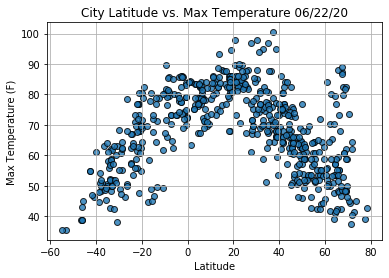

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

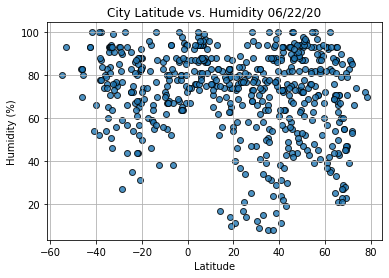

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

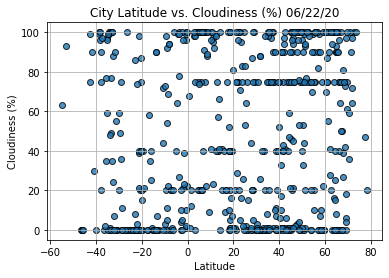

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

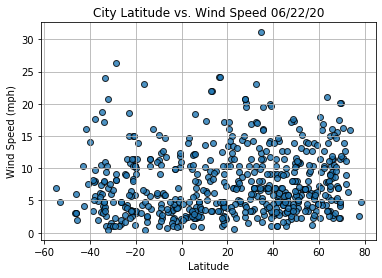

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()